# Lecture6　回帰分析2
<div dir='rtl'>
2022.4岩政
</div>


# 重回帰分析
2つの説明変数と関係しない変数の誤ったモデル

In [14]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

from mpl_toolkits.mplot3d import Axes3D # for 3D-graph, 明示的には使わないが、インポートしておく必要がある

np.random.seed(123) #再現性を得るため

## 重回帰分析
2つの説明変数と関係しない変数の誤ったモデル

In [15]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

from mpl_toolkits.mplot3d import Axes3D # for 3D-graph, 明示的には使わないが、インポートしておく必要がある

np.random.seed(123) #再現性を得るため

## F検定の値を見る
真のシステム：y = b1*x1 + b2*x2 + noise  
モデル:　y = b1*x1 + b2*x2

In [16]:
num = 30
noise = np.random.normal(0.0, 0.1, num)
rad = np.linspace(-np.pi,np.pi,num)
x1 = np.sin(rad)
x2 = np.random.normal(-2.0, 3.0, num)

In [17]:
b1, b2 = 1.1, -0.55 # beta_0, beta_1
y = b1*x1 + b2*x2 + noise
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
results = smf.ols('y ~ x1 + x2 -1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              5114.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):                    1.28e-36
Time:                        21:42:02   Log-Likelihood:                          23.316
No. Observations:                  30   AIC:                                     -42.63
Df Residuals:                      28   BIC:                                     -39.83
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1478      0.031     36.466      0.000       1.083       1.212
x2            -0.5564      0.006   -100.747      0.000      -0.568      -0.545
==============================================================================
Omnibus:                        0.861   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.872
Skew:                           0.350   Prob(JB):                        0.647
Kurtosis:                       2.545   Cond. No.                         5.95
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
b1, b2 = 0.0001, -0.000055
y = b1*x1 + b2*x2 + noise
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
results = smf.ols('y ~ x1 + x2 -1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.094
Model:                            OLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              1.451
Date:                Sun, 03 Apr 2022   Prob (F-statistic):                       0.251
Time:                        21:42:05   Log-Likelihood:                          23.316
No. Observations:                  30   AIC:                                     -42.63
Df Residuals:                      28   BIC:                                     -39.83
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0479      0.031      1.521      0.140      -0.017       0.112
x2            -0.0064      0.006     -1.160      0.256      -0.018       0.005
==============================================================================
Omnibus:                        0.861   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.872
Skew:                           0.350   Prob(JB):                        0.647
Kurtosis:                       2.545   Cond. No.                         5.95
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 多重共線性（multicollinearity）の影響を見る

In [19]:
num = 30
rad = np.linspace(-np.pi, np.pi, num)
x1 = np.sin(rad)
x2 = np.random.normal(-2.0, 3.0, num)

b1, b2 = 3.3, -1.25
noise = 0.001*np.random.normal( 0.0, 1.0, num)
y = b1*x1 + b2*x2 + noise

関係のないx3を測定したと仮定する

In [20]:
x3 = 3.35*np.sin((rad+0.001))+ 0.001*np.random.normal( 0.0, 1.0, num)
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'x3':x3})

In [21]:
results = smf.ols('y ~ x1 + x2 + x3 -1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.948e+08
Date:                Sun, 03 Apr 2022   Prob (F-statistic):                    4.00e-99
Time:                        21:42:14   Log-Likelihood:                          160.31
No. Observations:                  30   AIC:                                     -314.6
Df Residuals:                      27   BIC:                                     -310.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.3508      0.311     10.771      0.000       2.712       3.989
x2            -1.2500    5.9e-05  -2.12e+04      0.000      -1.250      -1.250
x3            -0.0152      0.093     -0.163      0.872      -0.206       0.175
==============================================================================
Omnibus:                        0.152   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.362
Skew:                           0.076   Prob(JB):                        0.834
Kurtosis:                       2.483   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

"The condition number is large"というWarningメッセージが出た場合。<br>
condition number（条件数）は、行列の固有値から計算される数値であり、この値が大きいほど連立方程式が解きにくくなり、<br>
解に誤差を含む可能性が高いことを示唆する。したがって、出力された数値解は、盲目的に信じることなく、注意して見守る必要がある。

#### モデル次数をシステムに合わせる

In [22]:
results = smf.ols('y ~ x1 + x2 -1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.027e+08
Date:                Sun, 03 Apr 2022   Prob (F-statistic):                   2.05e-103
Time:                        21:42:18   Log-Likelihood:                          160.30
No. Observations:                  30   AIC:                                     -316.6
Df Residuals:                      28   BIC:                                     -313.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.3000      0.000   1.05e+04      0.000       3.299       3.301
x2            -1.2500   5.68e-05   -2.2e+04      0.000      -1.250      -1.250
==============================================================================
Omnibus:                        0.219   Durbin-Watson:                   2.382
Prob(Omnibus):                  0.896   Jarque-Bera (JB):                0.420
Skew:                           0.076   Prob(JB):                        0.811
Kurtosis:                       2.440   Cond. No.                         5.54
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ３Dプロット，
参照　https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

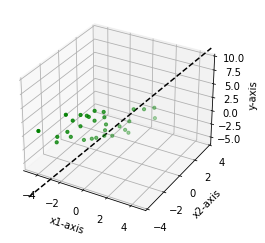

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 軸ラベルの設定
ax.set_xlabel("x1-axis")
ax.set_ylabel("x2-axis")
ax.set_zlabel("y-axis")

# 表示範囲の設定
ax.set_xlim(-5, 5)
ax.set_ylim(-4, 4)
ax.set_zlim(-6, 10)

#観測データのプロット
ax.scatter(x1, x2, y, s=10, color='green')

# モデル式の表示
xx1 = np.linspace(-5,5,num)
xx2 = np.linspace(-4,4,num)

c1, c2 = results.params

y0 = c1*xx1 + c2*xx2
ax.plot(xx1, xx2, y0, color='black', linestyle='dashed')
plt.show()

## 電力と気温

In [24]:

url = 'https://sites.google.com/site/datasciencehiro/datasets/ElectricPower.csv'
#url = 'datasets/ElectricPower.csv'
df_pow = pd.read_csv(url, comment='#', 
                    index_col='DATE', parse_dates=['DATE'],  
                     encoding='SHIFT-JIS' )
df_pow.head()

,TIME,Power
DATE,,
2017-01-01,0:00,2783
2017-01-01,1:00,2634
2017-01-01,2:00,2520
2017-01-01,3:00,2438
2017-01-01,4:00,2389


In [25]:
df_pow.tail()

,TIME,Power
DATE,,
2017-12-31,19:00,3527
2017-12-31,20:00,3443
2017-12-31,21:00,3335
2017-12-31,22:00,3200
2017-12-31,23:00,3141


#### ダウンサンプリング
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html  
時間軸を日単位として，最大電力だけとする

In [26]:
df_pow2 = df_pow.resample('D').max() # Dayへのダウンサンプリングと最大電力

In [27]:
print(df_pow2.head())
print(df_pow2.shape)

            TIME  Power
DATE                   
2017-01-01  9:00   2935
2017-01-02  9:00   3086
2017-01-03  9:00   3240
2017-01-04  9:00   3571
2017-01-05  9:00   4142
(365, 2)


#### 最高気温，最低気温のデータ読込み

In [28]:
df = pd.read_csv('https://sites.google.com/site/datasciencehiro/datasets/AirTemperature.csv', comment='#', 
                    index_col='Date', parse_dates=['Date'],  
                     encoding='SHIFT-JIS' )
print(df.head())
print(df.shape)

            MaxTemp  MinTemp
Date                        
2017-01-01     13.8      2.0
2017-01-02     13.3      3.8
2017-01-03     13.7      3.5
2017-01-04     14.0      3.6
2017-01-05     10.4      3.7
(365, 2)


#### データの結合

In [29]:
df['MaxPower'] = df_pow2.Power

In [43]:
df

,MaxTemp,MinTemp,MaxPower
Date,,,
2017-01-01,13.8,2.0,2935
2017-01-02,13.3,3.8,3086
2017-01-03,13.7,3.5,3240
2017-01-04,14.0,3.6,3571
2017-01-05,10.4,3.7,4142
...,...,...,...
2017-12-27,9.2,1.0,4413
2017-12-28,9.8,1.1,4174
2017-12-29,10.5,2.3,3772


In [30]:
result = smf.ols('MaxPower ~ MaxTemp + MinTemp', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MaxPower   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3421
Date:                Sun, 03 Apr 2022   Prob (F-statistic):              0.711
Time:                        21:42:53   Log-Likelihood:                -2799.2
No. Observations:                 365   AIC:                             5604.
Df Residuals:                     362   BIC:                             5616.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3919.7384    104.068     37.665      0.0

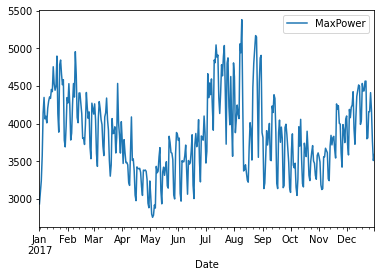

In [31]:
FLAG_fig=True
df.MaxPower.plot()
plt.legend()


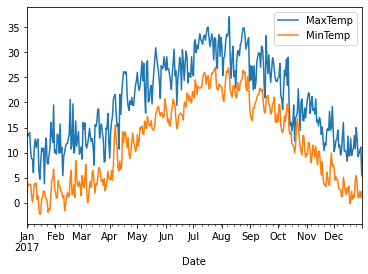

In [32]:
df.MaxTemp.plot()
df.MinTemp.plot()
plt.legend()


In [33]:
df1 = df['2017/1/15':'2017/4/30']
df2 = df['2017/5/1':'2017/8/31']

In [34]:
result1 = smf.ols('MaxPower ~ MaxTemp + MinTemp', data=df1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MaxPower   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     124.4
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           3.41e-28
Time:                        21:43:11   Log-Likelihood:                -738.60
No. Observations:                 106   AIC:                             1483.
Df Residuals:                     103   BIC:                             1491.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4831.8773     89.797     53.809      0.000    4653.787    5009.968
MaxTemp      -49.5928      8.269     -5.998      0.000     -65.992     -33.194
MinTemp      -41.9843      9.837     -4.268      0.000     -61.495     -22.474
==============================================================================
Omnibus:                        5.362   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                2.912
Skew:                          -0.164   Prob(JB):                        0.233
Kurtosis:                       2.257   Cond. No.                         58.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#予測
NewData = {'MaxTemp':[18.5, 14.0], 'MinTemp':[9.0, 6.5]}
NewDf = pd.DataFrame(NewData)
NewDf

,MaxTemp,MinTemp
0,18.5,9.0
1,14.0,6.5


In [37]:
pred = result.predict(NewDf)
pred

0    3857.418964
1    3872.206192
dtype: float64

In [38]:
result2 = smf.ols('MaxPower ~ MaxTemp + MinTemp', data=df2).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MaxPower   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     136.5
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           1.22e-31
Time:                        21:43:25   Log-Likelihood:                -896.64
No. Observations:                 123   AIC:                             1799.
Df Residuals:                     120   BIC:                             1808.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    400.5727    232.395      1.724      0.087     -59.553     860.699
MaxTemp       65.9611     12.546      5.258      0.000      41.122      90.801
MinTemp       78.7165     12.934      6.086      0.000      53.107     104.326
==============================================================================
Omnibus:                       18.757   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.456
Skew:                          -0.494   Prob(JB):                      0.00884
Kurtosis:                       2.067   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 一般化線形モデル　
### ロジスティック回帰モデル
対象：Spector and Mazzeo (1980) - Program Effectiveness Data <br>
http://www.statsmodels.org/dev/datasets/generated/spector.html


In [39]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

#import seaborn as sns

np.random.seed(123)

In [40]:
data = sm.datasets.spector.load().data
df = pd.DataFrame(data)
print(df.head())

    GPA  TUCE  PSI  GRADE
0  2.66  20.0  0.0    0.0
1  2.89  22.0  0.0    0.0
2  3.28  24.0  0.0    0.0
3  2.92  12.0  0.0    0.0
4  4.00  21.0  0.0    1.0


ロジスティック回帰は，リンク関数にLogit() を用いる一般化回帰モデル(GLM)の一種であるので，以下のようにも書くことができる
https://qiita.com/TomokIshii/items/374ac7d4231adf6a39f4

In [41]:
glm_model = 'GRADE ~ GPA + TUCE + PSI'
#fit = smf.glm(formula=glm_model, data=df, family=sm.families.Binomial(link=sm.families.links.logit))
fit = smf.glm(formula=glm_model, data=df, family=sm.families.Binomial())
result = fit.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                            GLM   Df Residuals:                       28
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.890
Date:                Sun, 03 Apr 2022   Deviance:                       25.779
Time:                        21:43:43   Pearson chi2:                     27.3
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3821
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.0213      4.931     -2.641      0.008     -22.686      -3.356
GPA            2.8261      1.263      2.238      0.025       0.351       5.301
TUCE           0.0952      0.142      0.672      0.501      -0.182       0.373
PSI            2.3787      1.065      2.234      0.025       0.292       4.465
==============================================================================
"""

sm.GLM() で family オプションをつけて使用する分布がBinomial となる指示をする．これで，リンク関数は(Binomialのディフォルトの) logit() を使う処理となる．出力される summary() は次の通り

In [42]:
df.corr()

,GPA,TUCE,PSI,GRADE
GPA,1.000000,0.386986,0.039683,0.497147
TUCE,0.386986,1.000000,0.112780,0.303055
PSI,0.039683,0.112780,1.000000,0.422760
GRADE,0.497147,0.303055,0.422760,1.000000


念のため，縦軸にGRADEをとり，横軸にGPA,色でPSI=1,0を区別したグラフから何かを言えるかを確かめてみた。　 しかし，あまり，有意な特徴を見出すことはできない。

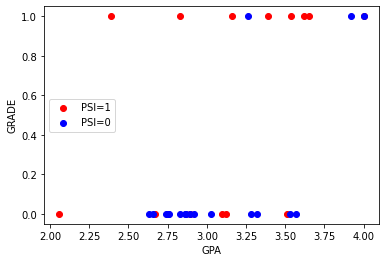

In [43]:
plt.scatter(df.GPA[df.PSI==1.0], df.GRADE[df.PSI == 1.0] ,c = "red", label = "PSI=1")
plt.scatter(df.GPA[df.PSI==0.0], df.GRADE[df.PSI == 0.0] ,c = "blue", label = "PSI=0")

plt.xlabel('GPA')
plt.ylabel('GRADE')
#plt.title('Red:PSI=1,  Blue:PSI=0')
plt.legend(loc='center left')

## 一般化線形モデル　
### ポアソン回帰モデル

Ref. 
 Possion GLM, https://onlinecourses.science.psu.edu/stat504/node/169  
 
$\lambda = \exp(\beta_0+ \beta_1)$

In [44]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)

#### ポアソン分布に従う確率変数ｙのデータ生成
$\lambda = \exp(\beta_0), \hspace{3mm} \beta_1 = 0$ の場合  
平均値をlamとおいた

In [45]:
Num = 1000
lam = 5 # lambda
y = np.random.poisson(lam,Num)

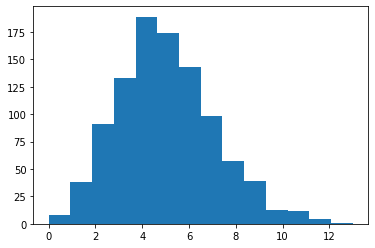

In [11]:
count, bins, ignored = plt.hist(y, 14, density=False)

if FLAG_fig: plt.savefig('fig_REG_GLM_Poisson1_hist.png')

#### 一部をプロット

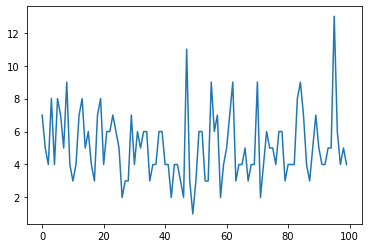

In [46]:
n = 100
plt.plot( y[0:n])


一般化線形モデル問題を解く

In [47]:
x = range(len(y))
df = pd.DataFrame({'x':x, 'y':y})

In [48]:
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson()).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2206.4
Date:                Sun, 03 Apr 2022   Deviance:                       1072.7
Time:                        21:44:17   Pearson chi2:                 1.02e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0001766
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5827      0.029     55.400      0.0

In [49]:
b0, b1 = result.params
print('exp(b0) =',np.exp(b0))

exp(b0) = 4.86817571577629


In [50]:
print('Mean of y =',df.y.mean())

Mean of y = 4.919


#### ポアソン分布に従う確率変数ｙのデータ生成
$\lambda = \exp(\beta_0 + \beta_1 x1)$, の場合  

In [52]:
Num = 1000
x = np.zeros(Num)
y = np.zeros(Num)

In [53]:
b0 , b1 = 0.5, 3.5
for i in range(Num):
    x[i] = i
    lam = np.exp( b0 + (b1/float(Num)) * (float(i)))
    y[i] = np.random.poisson(lam,1)

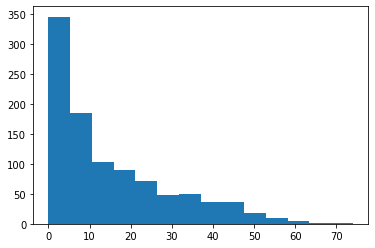

In [56]:
count, bins, ignored = plt.hist(y, 14, density=False)


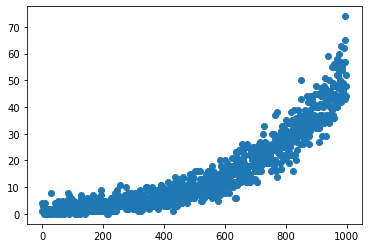

In [57]:
plt.scatter(x, y)

In [22]:
df = pd.DataFrame({'x':x, 'y':y})
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson()).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.2
Date:                Sun, 06 Mar 2022   Deviance:                       1035.6
Time:                        22:56:41   Pearson chi2:                 1.01e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5198      0.028     18.355      0.0

下記で　b1 = b1 * num としているのは，glmはlamの生成式にある(b1/float(num))を予測しており，この分母を払うため

In [58]:
b0, b1 = result.params
b1 = b1 * Num  # 見掛け上のパラメータの分母に(num)があるため，これを払う
print("b0 = %f  b1 = %f" % (b0,b1))

b0 = 1.582719  b1 = 0.020757


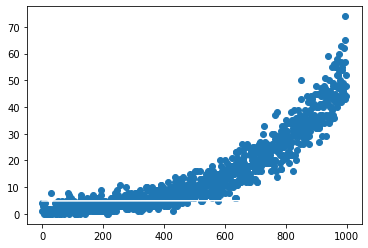

In [60]:
y_pre = np.exp(b0 + (b1/float(Num))*x)
plt.scatter(x[0:Num], y[0:Num])
plt.plot(x, y_pre, color = 'white')


#### データの前半500個[0:499]と後半500個[500:999]を入れ替える

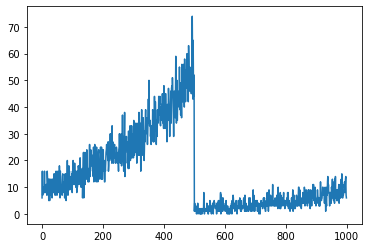

In [61]:
nlen = len(x)
n2 = int(nlen/2)

xx = np.zeros(nlen)  # この1行は，いわゆる copy.deepcopy() ( import copy )の意味のメモリ確保
if nlen % 2 == 0: #even
    nst = n2
else:
    nst = n2 + 1
    xx[n2] = x[n2]
    
xx[0:n2] = x[nst:nlen]
xx[nst:nlen]= x[0:n2]
"""
print(xx[0:5])
print(xx[(n2-1):(n2+4)])
print(xx[-5:])
"""
yy = np.zeros(nlen)  # この1行は，いわゆる copy.deepcopy() ( import copy )の意味のメモリ確保
yy[0:n2] = y[nst:nlen]
yy[nst:nlen]= y[0:n2]

plt.plot(yy[0:nlen]) # 注意：plot(xx,yy)とすると，先のグラフと同じになる



In [62]:
df = pd.DataFrame({'x':xx, 'y':yy})
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson()).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.2
Date:                Sun, 03 Apr 2022   Deviance:                       1035.6
Time:                        21:45:42   Pearson chi2:                 1.01e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5198      0.028     18.355      0.0

## Generalized Linear Models
 薬品とカブトムシの生存率
原著：Annette J. Dobson and Adrian G. Barnett, An Introduction to Generalized Linear Models, 3rd ed. , CRCPress 2008, p.127  
https://reneues.files.wordpress.com/2010/01/an-introduction-to-generalized-linear-models-second-edition-dobson.pdf


In [63]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf


x:投薬量，n:カブトムシの総数，y:死亡数

In [64]:
df = pd.DataFrame({'x':[1.6907, 1.7242, 1.7552, 1.7842, 1.8113, 1.8369, 1.861, 1.8839],
                   'n':[59, 60, 62, 56, 63, 59, 62, 60],
                   'y':[ 6, 13, 18, 28, 52, 53, 61, 60]})
print(df)

        x   n   y
0  1.6907  59   6
1  1.7242  60  13
2  1.7552  62  18
3  1.7842  56  28
4  1.8113  63  52
5  1.8369  59  53
6  1.8610  62  61
7  1.8839  60  60


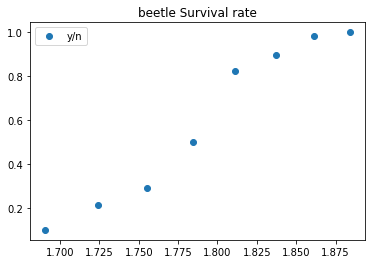

In [65]:
plt.plot(df.x,df.y/df.n,label="y/n",linestyle='None', marker='o')
plt.title('beetle Survival rate')
plt.legend()


生存(n-y)とそうでない（y）という表現の場合，n-yが生存であることを利用して，<br>
glm_model = 'y + I(n-y) ~ x' <br>
という表現を用いる。I()内の'-'は算術減算を表す。I()が無いと，かっこ内の'-’はPatsyの表記と見なされ'-y'はyを除去することとなる。

In [66]:
glm_model = 'y + I(n-y) ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Binomial()).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(n - y)']   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18.715
Date:                Sun, 03 Apr 2022   Deviance:                       11.232
Time:                        21:46:04   Pearson chi2:                     10.0
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.7175      5.181    -11.720      0.0

Text(0, 0.5, 'p')

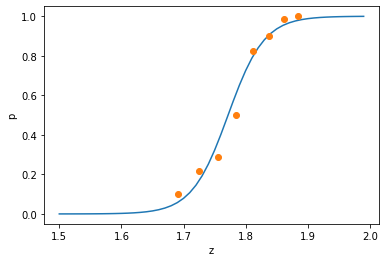

In [67]:
b0 , b1 = result.params
#x = np.arange(df.x.min(), df.x.max(), 0.1)
xx = np.arange(1.5, 2.0, 0.01)
#p = 1.0 /( 1.0 + np.exp( -(b0 + b1*xx ))) 
p = result.predict(exog = pd.DataFrame({'x': xx}))
plt.plot(xx,p)
plt.plot(df.x,df.y/df.n,label="y/n",linestyle='None', marker='o')

plt.xlabel('z')
plt.ylabel('p')
